## Pre-presentation Survey

![Alt text](./survey.png)

## Agenda

- Overview of an experiment.

- What is design of experiments?

- Key concepts in DOE.

- Design of experiments methods.

- What is PyDOE3?

- Full Factorial 

- Latin Hypercube Sampling

## Overview of an experiment

![Alt text](./doe_thermal_runaway_batteries_final.png)

## What is Design of Experiments?

- Design of Experiments (DOE) is a systematic method to understand the relationship between factors and the output of a process.
- Widely used in manufacturing and research.
- Helps in optimizing processes, identifying key variables, and building predictive models.

## Key Concepts in DOE

- **Factors**: These are the independent variables that are manipulated or changed during the experiment.

- **Levels**: The specific values that a factor can take.

- **Response**: This is the dependent variable or outcome measured during the experiment.

- **Treatments**: These are the combinations of factor levels being tested in an experiment.

- **Replication**: Running the experiment multiple times at the same treatment levels to reduce variability and increase reliability.

- **Randomization**: Randomly assigning the order in which treatments are applied to minimize the effect of uncontrollable variables or biases.

- **Interaction Effects**: DOE allows researchers to study how factors interact with each other and whether the combined effect of two or more factors is different from their individual effects.

## Design of experiments methods

- Full Factorial. 
- Fractional Factorial.
- Latin Hypercube Sampling. 
- Response Surface Methodology.


## What is pyDOE3?
- `pyDOE3`: A Python library for generating experimental designs.
- Open-Source and Free: Integrated into the Python ecosystem.
- It provides tools for efficient sampling of multi-dimensional spaces.
- DOE designs: 
Full Factorial. 
Fractional Factorial. 
Latin Hypercube Sampling. 
Response Surface Methodology.

## Why pyDOE3?
- Seamlessly integrates with Python libraries like `numpy`, `pandas`, `scipy`, and `statsmodels`.

X


## Full Factorial Designs
- **Definition**: Full factorial design is an experimental design in which all possible combinations of factor levels are tested.
- **Use Case**: Useful when you want to examine the interaction effects between multiple factors thoroughly.
- **Example**: If you have two factors (e.g., Temperature and Pressure) each with three levels, a full factorial design will involve \( 3 x 3 = 9 \) runs.
- **Advantages**:
    - Tests all combinations of factor levels.
    - Provides a complete understanding of both main effects and interaction effects.
- **Limitations**:
    - Can become impractical with many factors or levels, as the number of runs grows exponentially.

In [1]:
import numpy as np
import pandas as pd
from pyDOE3 import fullfact

# Define the levels for each factor
# 3 levels for temperature, 3 levels for charging speed, and 3 levels for battery size
levels = [2, 3, 3]  # This represents 3 levels for each of the 3 factors

# Generate the full factorial design
design = fullfact(levels)

# Calculate the total number of combinations
total_combinations = np.prod(levels)

# Convert the design matrix to understandable levels

# Map the design to real-world values
temperature_map = {0: 'Cold', 1: 'Hot'}
speed_map = {0: 'Slow', 1: 'Medium', 2: 'Fast'}
size_map = {0: 'Small', 1: 'Medium', 2: 'Large'}

# Loop through the design and print the combinations
for row in design:
    temp = temperature_map[int(row[0])]
    speed = speed_map[int(row[1])]
    size = size_map[int(row[2])]
    print(f'Treatment: {size} Battery, {temp} Temperature, {speed} Charging Speed')

# Print the total number of combinations
print(f'\nTotal number of treatments: {total_combinations}')

Treatment: Small Battery, Cold Temperature, Slow Charging Speed
Treatment: Small Battery, Room Temperature, Slow Charging Speed
Treatment: Small Battery, Cold Temperature, Medium Charging Speed
Treatment: Small Battery, Room Temperature, Medium Charging Speed
Treatment: Small Battery, Cold Temperature, Fast Charging Speed
Treatment: Small Battery, Room Temperature, Fast Charging Speed
Treatment: Medium Battery, Cold Temperature, Slow Charging Speed
Treatment: Medium Battery, Room Temperature, Slow Charging Speed
Treatment: Medium Battery, Cold Temperature, Medium Charging Speed
Treatment: Medium Battery, Room Temperature, Medium Charging Speed
Treatment: Medium Battery, Cold Temperature, Fast Charging Speed
Treatment: Medium Battery, Room Temperature, Fast Charging Speed
Treatment: Large Battery, Cold Temperature, Slow Charging Speed
Treatment: Large Battery, Room Temperature, Slow Charging Speed
Treatment: Large Battery, Cold Temperature, Medium Charging Speed
Treatment: Large Battery

## Latin Hypercube Sampling (LHS)
- **Definition**: LHS is used to generate a sample of plausible values from a multidimensional distribution.
- **Use Case**: Useful in scenarios requiring random sampling of large parameter spaces, typically for uncertainty analysis and simulations.
- **Advantages**:
    - Ensures that each parameter's range is evenly sampled, providing comprehensive coverage.
    - Works well in scenarios where computational simulations are expensive, and good coverage is desired with fewer samples.
- **Limitations**: The effectiveness of LHS depends on the correct selection of the number of samples.

In [1]:
from pyDOE3 import lhs

# Number of samples (let's choose 10 for this example)
n_samples = 10

# Define the number of factors (3 factors: Temperature, Charging Speed, Battery Size)
n_factors = 3

# Generate the Latin Hypercube Sampling
lhs_samples = lhs(n_factors, samples=n_samples)

# Now, map the LHS samples to the actual factor ranges
# Define ranges for each factor

# Temperature range: Let's assume we have continuous values between 20°C and 80°C
temp_min, temp_max = 20, 80

# Charging speed range: Assume values between 0.5C and 2C (C-rate)
speed_min, speed_max = 0.5, 2

# Battery size: Assume battery capacity in mAh (from 1000 mAh to 5000 mAh)
size_min, size_max = 1000, 5000

# Scale the LHS samples to the actual ranges for each factor
temperatures = temp_min + (temp_max - temp_min) * lhs_samples[:, 0]
charging_speeds = speed_min + (speed_max - speed_min) * lhs_samples[:, 1]
battery_sizes = size_min + (size_max - size_min) * lhs_samples[:, 2]

# Combine the results into a structured format
for i in range(n_samples):
    print(f'Sample {i+1}: Temperature = {temperatures[i]:.2f}°C, Charging Speed = {charging_speeds[i]:.2f}C, Battery Size = {battery_sizes[i]:.2f} mAh')


Sample 1: Temperature = 50.56°C, Charging Speed = 1.27C, Battery Size = 4684.08 mAh
Sample 2: Temperature = 73.27°C, Charging Speed = 0.76C, Battery Size = 1433.35 mAh
Sample 3: Temperature = 75.73°C, Charging Speed = 0.99C, Battery Size = 1285.18 mAh
Sample 4: Temperature = 58.02°C, Charging Speed = 0.61C, Battery Size = 2781.50 mAh
Sample 5: Temperature = 65.84°C, Charging Speed = 1.59C, Battery Size = 3231.33 mAh
Sample 6: Temperature = 24.33°C, Charging Speed = 1.42C, Battery Size = 3901.33 mAh
Sample 7: Temperature = 26.28°C, Charging Speed = 1.94C, Battery Size = 2448.70 mAh
Sample 8: Temperature = 37.85°C, Charging Speed = 1.14C, Battery Size = 3461.18 mAh
Sample 9: Temperature = 45.98°C, Charging Speed = 0.87C, Battery Size = 1895.92 mAh
Sample 10: Temperature = 39.26°C, Charging Speed = 1.74C, Battery Size = 4364.35 mAh


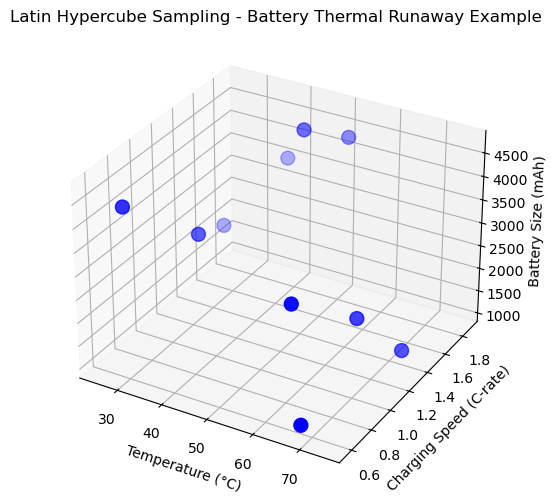

In [3]:
# Number of samples (let's choose 10 for this example)
n_samples = 10

# Define the number of factors (3 factors: Temperature, Charging Speed, Battery Size)
n_factors = 3

# Generate the Latin Hypercube Sampling
lhs_samples = lhs(n_factors, samples=n_samples)

# Now, map the LHS samples to the actual factor ranges
# Define ranges for each factor

# Temperature range: Let's assume we have continuous values between 20°C and 80°C
temp_min, temp_max = 20, 80

# Charging speed range: Assume values between 0.5C and 2C (C-rate)
speed_min, speed_max = 0.5, 2

# Battery size: Assume battery capacity in mAh (from 1000 mAh to 5000 mAh)
size_min, size_max = 1000, 5000

# Scale the LHS samples to the actual ranges for each factor
temperatures = temp_min + (temp_max - temp_min) * lhs_samples[:, 0]
charging_speeds = speed_min + (speed_max - speed_min) * lhs_samples[:, 1]
battery_sizes = size_min + (size_max - size_min) * lhs_samples[:, 2]

# Create a 3D scatter plot to visualize the LHS samples
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the samples
ax.scatter(temperatures, charging_speeds, battery_sizes, c='b', marker='o', s=100)

# Labels for axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Charging Speed (C-rate)')
ax.set_zlabel('Battery Size (mAh)')

# Title of the plot
ax.set_title('Latin Hypercube Sampling - Battery Thermal Runaway Example')

# Show the plot
plt.show()

# P-value and Hypothesis Testing

- **P-value**: The probability of observing the data, or something more extreme, assuming the **null hypothesis** is true. A small p-value (typically < 0.05) suggests the observed data is unlikely under the null hypothesis.
  
- **Null Hypothesis (H₀)**: A default assumption that there is **no effect** or **no difference** between groups (e.g., no change in battery performance with different charging rates).

- **Reject the Null Hypothesis**: If the p-value is small (e.g., < 0.05), we conclude that the observed data provide enough evidence to **reject H₀** and suggest that an effect or difference exists.

- **Fail to Reject the Null Hypothesis**: If the p-value is large (e.g., > 0.05), we **fail to reject H₀**, meaning there isn’t enough evidence to conclude an effect or difference, but this doesn’t prove H₀ is true.


## ANOVA (Analysis of Variance)

- **ANOVA**: A statistical test used to compare the means of various groups to see if at least one group is significantly different. It helps test whether factors (e.g., temperature, charging speed) have an effect on the outcome.

- **ANOVA Equivalence Test**: This test determines whether **all groups are practically equivalent**, meaning the observed differences are too small to be of practical significance.